# Parcial 1

Fernando Moreno jofmorenore@unal.edu.co, 
Frank Pedraza fpedraza@unal.edu.co

## Punto 1

Serie Asignada Archivo exportaciones.xlsx


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf # ols
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
%load_ext rpy2.ipython

+ **Cuero**

In [3]:
%%R
library(readr)
df_cuero = read_delim("exportaciones.csv", delim = ";", locale=locale(decimal_mark = ","))
str(df_cuero)

Rows: 631 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Fecha
dbl (11): banano, flores, total_sector_agro, oro, esmeraldas, total_sector_m...
num  (1): total_sector_industrial

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
spec_tbl_df [631 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Fecha                  : chr [1:631] "1/01/1970" "1/02/1970" "1/03/1970" "1/04/1970" ...
 $ banano                 : num [1:631] 0 0 0 0 0 0 0 0 0 0 ...
 $ flores                 : num [1:631] 0 0 0 0 0 0 0 0 0 0 ...
 $ total_sector_agro      : num [1:631] 3.7 4.6 5.6 4.3 5.4 4 3.8 4.3 5 2.7 ...
 $ oro                    : num [1:631] 0 0 0 0 0 0 0 0 0 0 ...
 $ esmeraldas             : num [1:631] 0.3 0.3 0.4 0.3 0.4 0.3 0.3 0.3 0.3 0.2 ...
 $ total_sector_minero    : num [1:631] 1.5 1.7 2.1 1.7 2.1 1.6 1.5 1.6 1.8 1 ...
 $ t

In [ ]:
%%R
install.packages("tsibble")
install.packages("xts")
install.packages("ggfortify")
install.packages("timetk")
install.packages("forecast")
library(forecast)
library(timetk)
library(ggfortify)
library(tsibble)
library(xts)
library(dplyr)
library(lubridate)

In [5]:
%%R
df_cuero = select(df_cuero, c("Fecha", cuero= "cuero "))
df_cuero$Fecha = dmy(df_cuero$Fecha)
df_cuero = filter(df_cuero, year(Fecha)>1990)
str(df_cuero)

tibble [379 × 2] (S3: tbl_df/tbl/data.frame)
 $ Fecha: Date[1:379], format: "1991-01-01" "1991-02-01" ...
 $ cuero: num [1:379] 14.1 22 16.7 21.4 22.4 14.8 23.6 20.3 21.8 29.3 ...


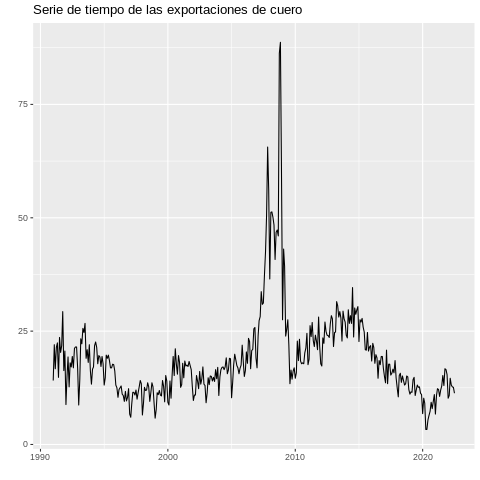

In [6]:
%%R
xts_cuero = xts(x = df_cuero$cuero, order.by = df_cuero$Fecha, frequency = 12 )
xts_cuero %>% autoplot(main = "Serie de tiempo de las exportaciones de cuero")

La serie de exportaciones de cuero no muestra tendencia , tampoco parece tener un ciclo estacional debido a que los valores máximos de la serie en cada año no están en los mismos meses de cada año, por otra parte la serie sí muestra heterocedasticidad marginal debido a que la variabilidad alrededor de los años del 2006 al 2010 no es la misma que la variabilidad en los otros años, por lo anterior es razonable pensar que la serie no sea estacionaria porque el valor medio no es el mismo a lo largo de la serie, sin embargo para chequear esto se realizan los gráficos de las funciones de autocorrelación y autocorrelación parcial, mientras que para validar que no presenta tendencia ni ciclo estacional, se estima la tendencia usando el filtro de promedios móviles, y el gráfico de diagnóstico estacional.

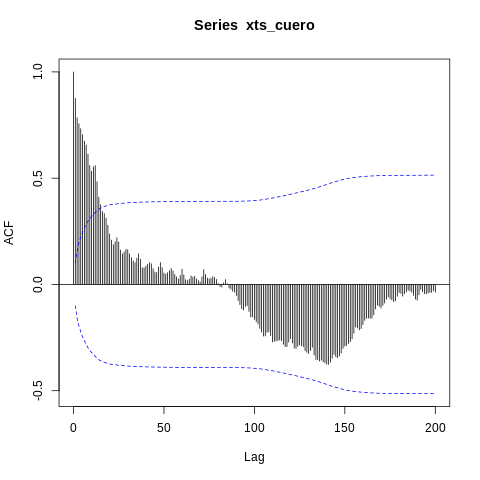

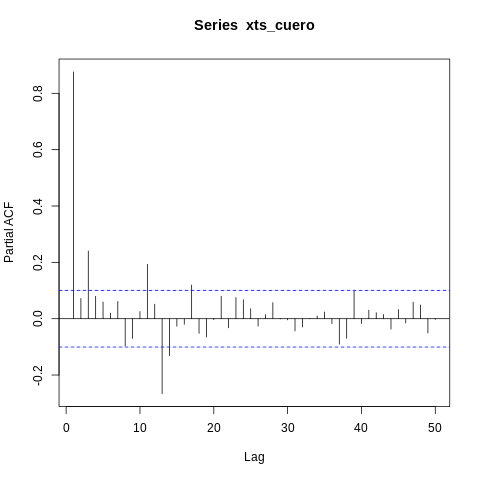

In [8]:
%%R
acf(xts_cuero, ci.type='ma', lag.max = 200)
pacf(xts_cuero, lag.max = 50)

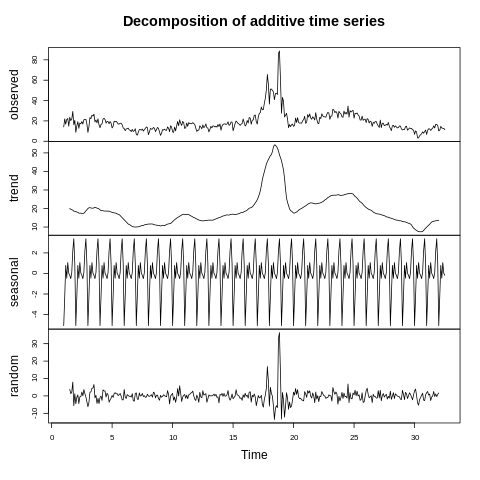

In [9]:
%%R
ts_cuero = ts(xts_cuero, frequency = 12)
plot(decompose(ts_cuero))

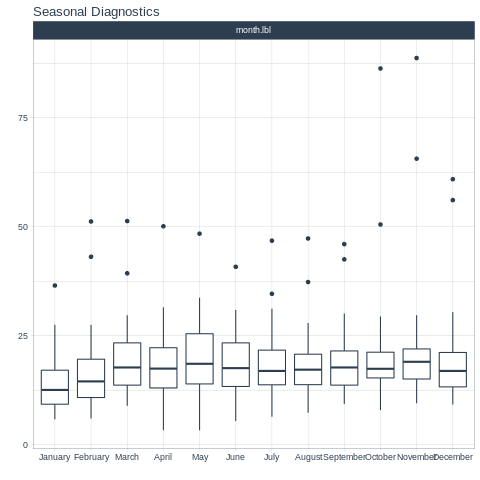

In [10]:
%%R
df_cuero %>% plot_seasonal_diagnostics(.date_var = Fecha, .value = cuero, .feature_set = c("month.lbl"),.geom="boxplot",  .interactive = F) 

A partir de la gráfica de AFC se puede ver que no se va rapidamente a cero con lo cual concluimos que la serie no es estacionaria, por otra parte a partir de la descomposicón de promedios móviles vemos que la componente estacional no parece deterministica (una función suave) ni aleatoria, con lo cual concluimos que no presenta tendencia, por último a partir del gráfico de diagnóstico estacional concluimos que la serie no presenta ciclo estacional, debido a que no hay diferencias entre cada unos de los meses.

## Punto 5

+ **Punto 17**

In [11]:
punto17=pd.read_excel(r'https://github.com/jofmorenore/TimeSeries/blob/master/proyecto/parcial2/tasaocupaciontraffic.xlsx?raw=true')
punto17.head(10)

,Fechas,Punto15,Punto16,Punto17,Punto200
0,2000-01-01 00:00:00,0.0048,0.0146,0.0289,0.0122
1,2000-01-01 01:00:00,0.0072,0.0148,0.0350,0.0154
2,2000-01-01 02:00:00,0.0040,0.0101,0.0267,0.0113
3,2000-01-01 03:00:00,0.0039,0.0060,0.0218,0.0074
4,2000-01-01 04:00:00,0.0042,0.0055,0.0191,0.0069
5,2000-01-01 05:00:00,0.0040,0.0071,0.0213,0.0102
6,2000-01-01 06:00:00,0.0044,0.0089,0.0259,0.0134
7,2000-01-01 07:00:00,0.0042,0.0100,0.0249,0.0134
8,2000-01-01 08:00:00,0.0086,0.0123,0.0288,0.0185
9,2000-01-01 09:00:00,0.0223,0.0177,0.0359,0.0271


In [12]:
punto17['Fechas']=pd.to_datetime(punto17['Fechas'])
ts_punto17=pd.Series(punto17['Punto17'].values,punto17['Fechas'],name='punto17')
ts_punto17.index.freq='H'
ts_punto17.head(10)

Fechas
2000-01-01 00:00:00    0.0289
2000-01-01 01:00:00    0.0350
2000-01-01 02:00:00    0.0267
2000-01-01 03:00:00    0.0218
2000-01-01 04:00:00    0.0191
2000-01-01 05:00:00    0.0213
2000-01-01 06:00:00    0.0259
2000-01-01 07:00:00    0.0249
2000-01-01 08:00:00    0.0288
2000-01-01 09:00:00    0.0359
Freq: H, Name: punto17, dtype: float64

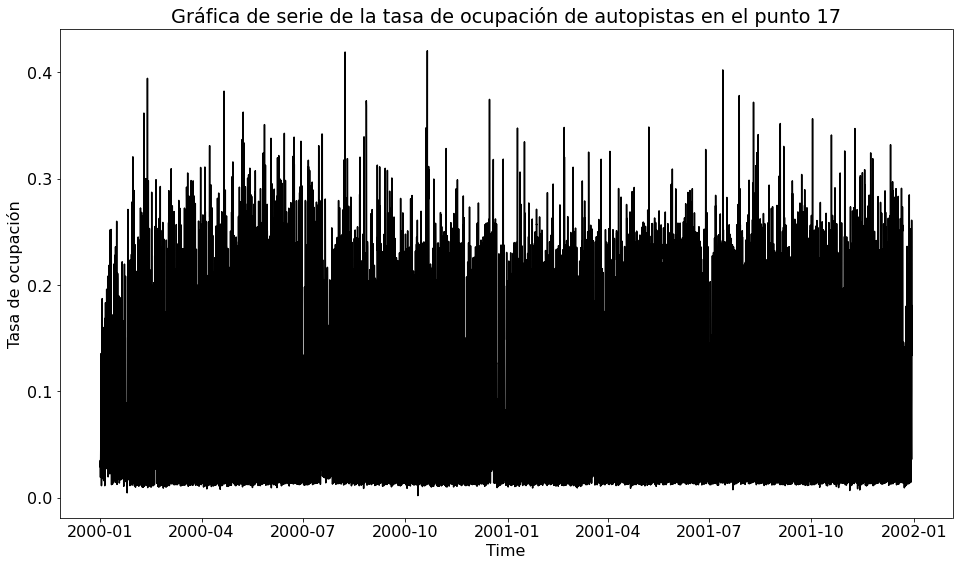

In [13]:
plt.rc('font', size=16)
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'Tasa de ocupación')
ax.plot(ts_punto17, color = '#000000')
ax.set_title('Gráfica de serie de la tasa de ocupación de autopistas en el punto 17')

plt.show()

A partir del gráfico completo de la serie no se puede describir mucho del comportamiento, debido a que es una serie horaria, por lo cual se recurre a los gráficos de la funciones de autocorrelación y autocorrelación parcial para chequear estacionariedad, mientras que se estima si tiene componente detendencia a través de el filtro de promedios móviles y finalmente se chequea si hay presencia de ciclo estacional a partir del gráfico de diagnóstico de estacionalidad.

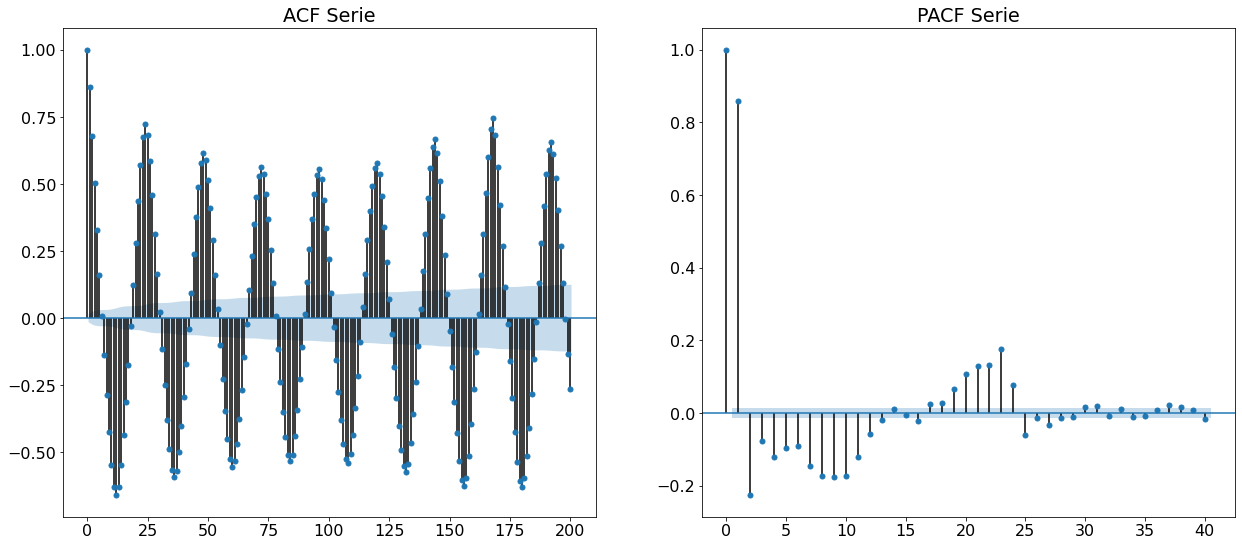

In [24]:
fig, ax = plt.subplots(1,2,figsize=(21,9))

plot_acf(ts_punto17.dropna(), lags=200, ax=ax[0],title='ACF Serie')
plot_pacf(ts_punto17.dropna(), lags=40, ax=ax[1],title='PACF Serie').show()

plt.show()

In [45]:
%%R -i punto17
xts_punto17 = xts(x = punto17$Punto17, order.by = punto17$Fecha, frequency = 24)
ts_punto17 = ts(xts_punto17, frequency =24)

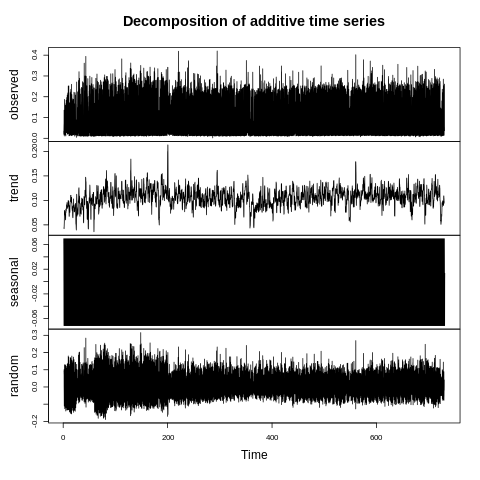

In [21]:
%%R
plot(decompose(ts_punto17))

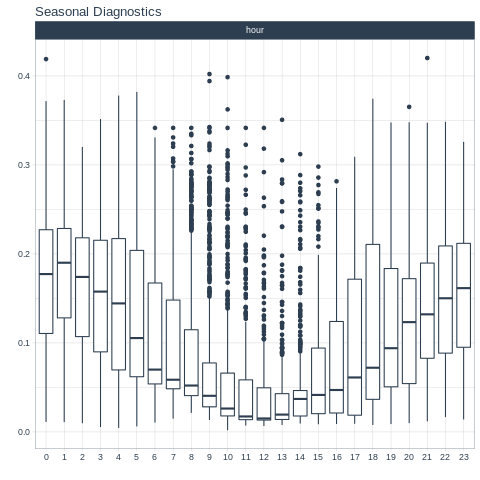

In [25]:
%%R
punto17 %>% plot_seasonal_diagnostics(.date_var = Fechas, .value = Punto17, .feature_set = c("hour"),.geom="boxplot",  .interactive = F) 

A partir de los anteriores gráficos se concluye que la serie no es estacionaria debido a que la función de autocorrelación no se va rapidamente a cero, por otro lado no se evidencia componente de tendencia en la descomposición usando el filtro de pormedios móviles, y finalmente se concluye que parece haber un ciclo estacional alrededor de las horas del medio día en las cuales alcanza su valores mínimos.

A partir de las conclusiones anteriores es razonable ajustar modelos que tengan en cuenta la componente estacional como por ejemplo un modelo SARIMA, o un modelo STL. 